# Exploratory Data Analysis (EDA) for Custom Dietary Profiles

Performing EDA on the `custom_dietary_profiles.csv` dataset generated for evaluating the LLM's personalized dietary recommendation capabilities.

## 1. Setup and Load Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter # For parsing allergies

# Set plot style (optional)
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6) # Default figure size

In [2]:
# Load the dataset
file_path = 'custom_dietary_profiles.csv'
try:
    # Adding display import for notebooks
    from IPython.display import display
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
    print(f"Shape: {df.shape}")
    print("\nFirst 5 rows:")
    display(df.head())
except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
except Exception as e:
    print(f"Error loading dataset: {e}")

Dataset loaded successfully.
Shape: (50, 7)

First 5 rows:


,ProfileID,AgeGroup,Sex,DietaryRestrictions,Allergies,HealthGoal,SampleQuery
0,P001,30-44,Female,Vegan,NaN,General Health,Suggest a healthy lunch idea.
1,P002,18-29,Male,NaN,Peanuts,Muscle Gain,What's a good post-workout snack?
2,P003,45-59,Female,Gluten-Free,Dairy,Weight Loss,Recommend a low-calorie dinner.
3,P004,45-59,Female,Pescatarian,NaN,Muscle Gain,What can I eat for dinner?
4,P005,30-44,Female,Low-Carb,Eggs,Lower Cholesterol,Suggest a healthy breakfast.


## 2. Analyze Categorical Features

We will analyze the distribution of the key categorical features used to define the user profiles.

### 2.1 Age Group Distribution

Age Group Counts:
AgeGroup
18-29    12
30-44    13
45-59    13
60+      12
Name: count, dtype: int64


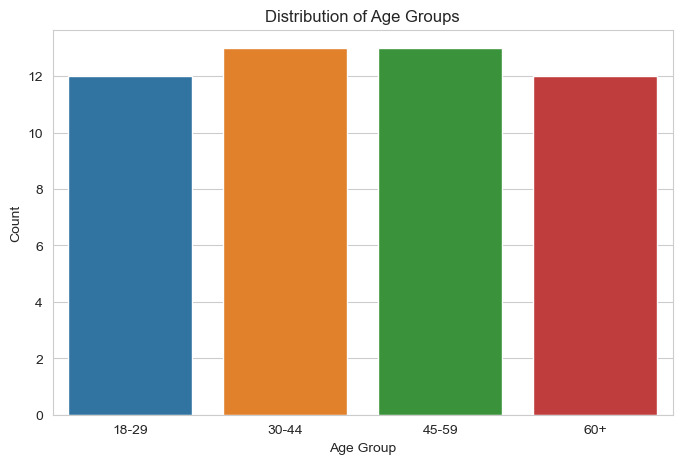

In [3]:
# Calculate frequency counts for AgeGroup
age_counts = df['AgeGroup'].value_counts().sort_index() # Sort for consistent order
print("Age Group Counts:")
print(age_counts)

# Plot the distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='AgeGroup', order=age_counts.index)
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

**Notes:**
*The age groups appear relatively balanced, as expected from the random generation process. Each group (18-29, 30-44, 45-59, 60+) has a similar number of profiles, ensuring we test the LLM across different adult life stages.*

### 2.2 Sex Distribution

Sex Counts:
Sex
Male      29
Female    21
Name: count, dtype: int64


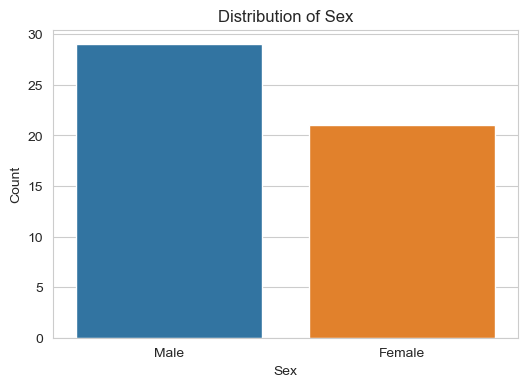

In [4]:
# Calculate frequency counts for Sex
sex_counts = df['Sex'].value_counts()
print("Sex Counts:")
print(sex_counts)

# Plot the distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Sex', order=sex_counts.index)
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

**Notes:**
*The distribution between Male and Female profiles is roughly equal, which is good for avoiding gender bias in the test scenarios.*

### 2.3 Dietary Restrictions Distribution

Dietary Restriction Counts:
DietaryRestrictions
Vegan          10
Low-Carb        7
Keto            7
Gluten-Free     5
Pescatarian     4
Vegetarian      4
Paleo           3
Name: count, dtype: int64


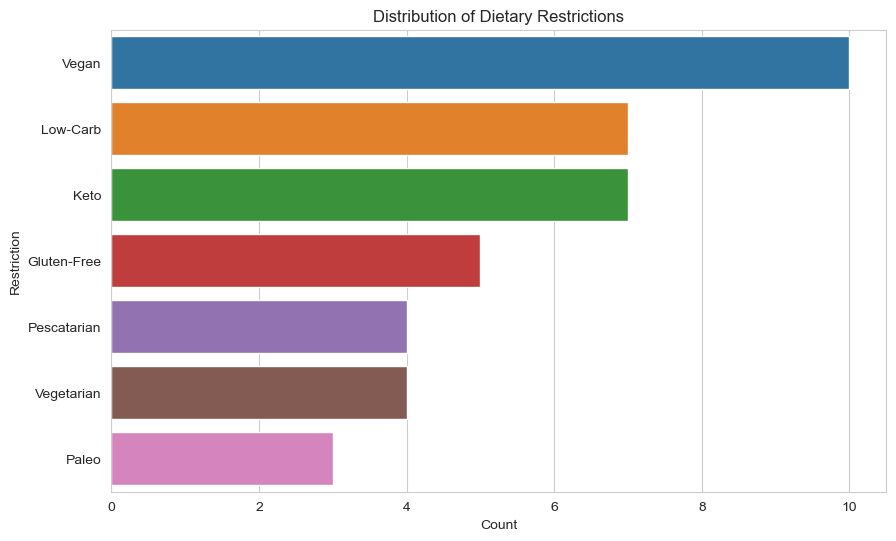

In [5]:
# Calculate frequency counts for DietaryRestrictions
restriction_counts = df['DietaryRestrictions'].value_counts()
print("Dietary Restriction Counts:")
print(restriction_counts)

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='DietaryRestrictions', order=restriction_counts.index) # Use y for better readability
plt.title('Distribution of Dietary Restrictions')
plt.xlabel('Count')
plt.ylabel('Restriction')
plt.show()

**Notes:**
*The dataset includes a variety of dietary restrictions, including 'None'. The distribution seems reasonably spread across common diets like Vegan, Vegetarian, Gluten-Free, Keto, etc., although random chance might lead to some being slightly more or less frequent than others. This variety is crucial for testing the LLM's ability to handle different dietary rules.*

### 2.4 Allergies Distribution

*Note: Allergies can be comma-separated. We will first look at the combinations and then parse individual allergies.*

Allergy Combination Counts (Top 15):
Allergies
Eggs                  3
Peanuts               2
Fish, Eggs            2
Shellfish             2
Tree Nuts             2
Dairy                 2
Peanuts, Tree Nuts    1
Fish                  1
Dairy, Fish           1
Eggs, Soy             1
Soy                   1
Eggs, Gluten          1
Shellfish, Dairy      1
Tree Nuts, Dairy      1
Peanuts, Dairy        1
Name: count, dtype: int64


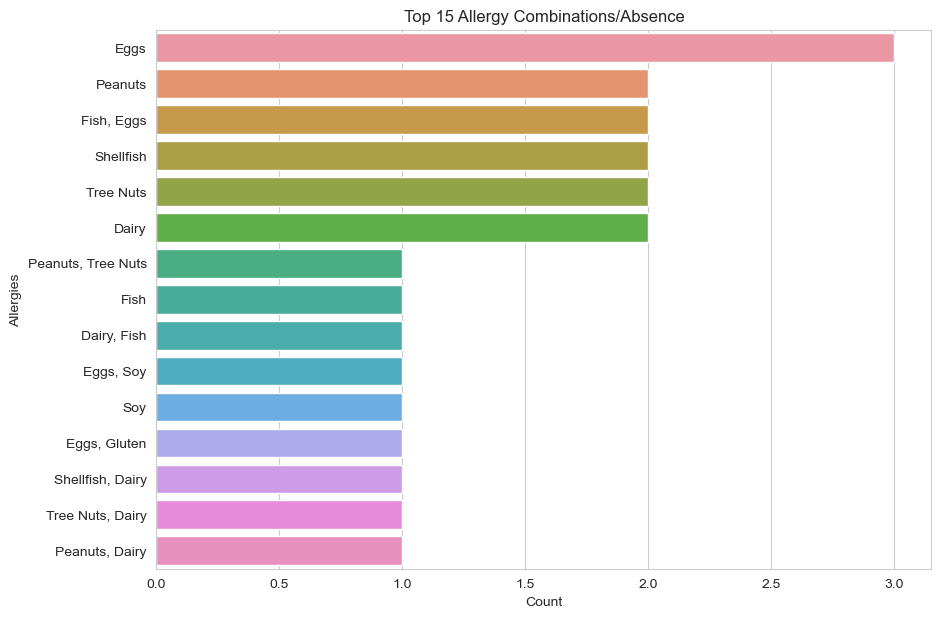


Individual Allergy Counts (Excluding None):
Allergies
Eggs         9
Peanuts      6
Dairy        6
Tree Nuts    6
Fish         5
Gluten       3
Soy          3
Shellfish    3
Name: count, dtype: int64


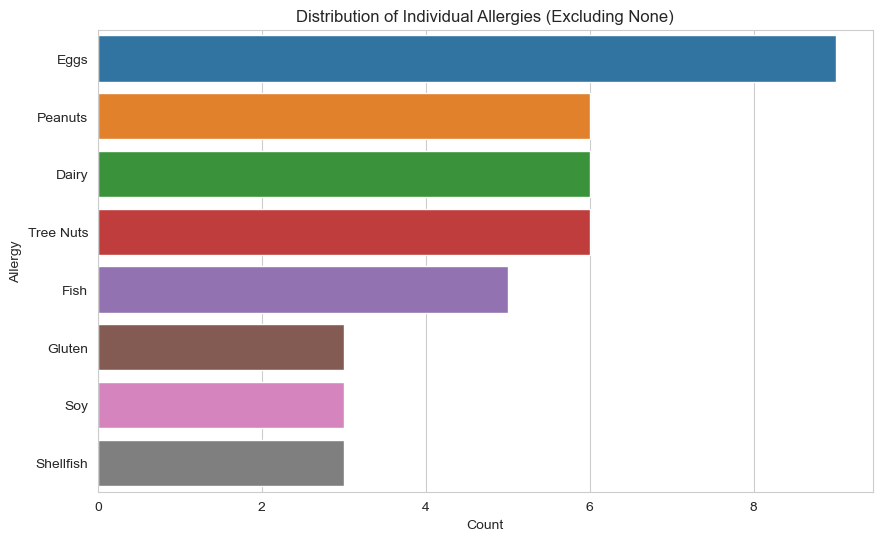

In [6]:
# Simple analysis of the raw 'Allergies' string counts first
allergy_combo_counts = df['Allergies'].value_counts()
print("Allergy Combination Counts (Top 15):")
print(allergy_combo_counts.head(15))

# Plot the top N allergy combinations
top_n = 15
plt.figure(figsize=(10, 7))
sns.countplot(data=df[df['Allergies'].isin(allergy_combo_counts.head(top_n).index)], y='Allergies', order=allergy_combo_counts.head(top_n).index)
plt.title(f'Top {top_n} Allergy Combinations/Absence')
plt.xlabel('Count')
plt.ylabel('Allergies')
plt.show()

# Advanced: Parse individual allergies
# Handle potential NaN values if any profile generation failed, fill with 'None'
df['Allergies'] = df['Allergies'].fillna('None') 
all_individual_allergies = df['Allergies'].str.split(', ').explode()
individual_allergy_counts = all_individual_allergies[all_individual_allergies != 'None'].value_counts()

print('\nIndividual Allergy Counts (Excluding None):')
print(individual_allergy_counts)

# Plot individual allergy counts
if not individual_allergy_counts.empty:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=individual_allergy_counts.values, y=individual_allergy_counts.index)
    plt.title('Distribution of Individual Allergies (Excluding None)')
    plt.xlabel('Count')
    plt.ylabel('Allergy')
    plt.show()
else:
    print("No individual allergies (other than 'None') found to plot.")

**Notes:**
*A significant portion of profiles have 'None' for allergies, which is realistic. The analysis shows various single and double allergy combinations. Parsing individual allergies reveals the frequency of specific allergens like Dairy, Peanuts, Gluten, etc., within the dataset. The distribution seems plausible, covering common allergens.*

### 2.5 Health Goal Distribution

Health Goal Counts:
HealthGoal
Weight Loss           8
Heart Health          8
Improve Gut Health    7
Manage Diabetes       7
General Health        6
Lower Cholesterol     6
Muscle Gain           5
Increase Energy       3
Name: count, dtype: int64


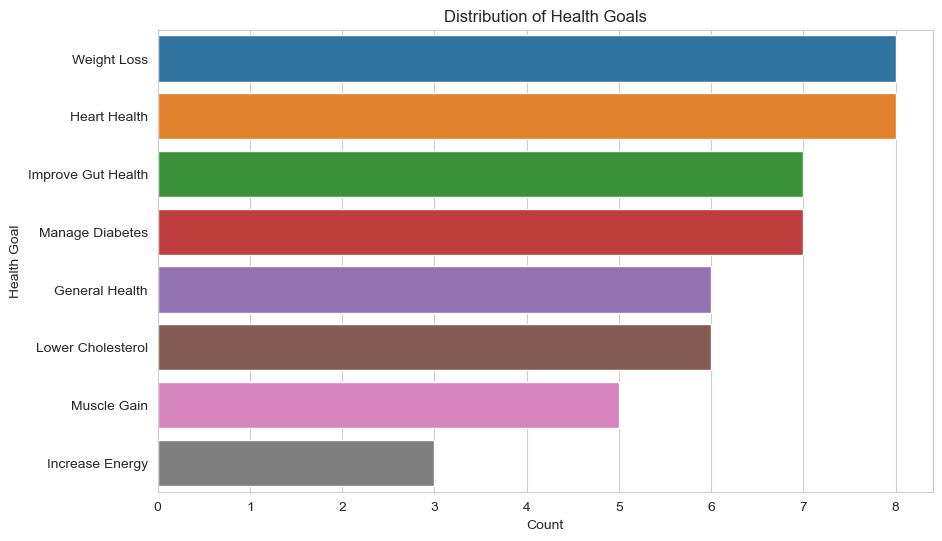

In [7]:
# Calculate frequency counts for HealthGoal
goal_counts = df['HealthGoal'].value_counts()
print("Health Goal Counts:")
print(goal_counts)

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='HealthGoal', order=goal_counts.index)
plt.title('Distribution of Health Goals')
plt.xlabel('Count')
plt.ylabel('Health Goal')
plt.show()

**Commentary:**
*The health goals are distributed across various common objectives like Weight Loss, Muscle Gain, General Health, and managing specific conditions like Diabetes. The random generation appears to have created a good mix, ensuring the LLM is tested against different user motivations.*

## 3. Overall Dataset Assessment

**Summary of Findings:**
*The generated dataset of 50 profiles shows a reasonable distribution across age groups and sexes. It incorporates a variety of dietary restrictions, common allergies (including none, single, and multiple), and diverse health goals. The random generation process resulted in a varied set of scenarios for testing.* 

**Limitations and Biases:**
*As the dataset was generated randomly based on predefined lists, it doesn't reflect real-world correlations between demographics, diets, allergies, and goals. For instance, certain diets might be more prevalent in specific age groups in reality. The list of allergies, restrictions, and goals, while covering common cases, is not exhaustive. The number of profiles (50) is relatively small for drawing broad conclusions but should be adequate for initial LLM evaluation as per the assignment scope.*

**Feasibility for Project:**
*Despite the limitations inherent in synthetic data generation, the dataset is deemed feasible and suitable for the project's objective. It provides the necessary structured input (specific restrictions, allergies, goals per profile) to test the LLM's ability to generate personalized dietary advice across a diverse range of scenarios. The variety ensures we can assess the LLM's handling of different constraints.*